<a href="https://colab.research.google.com/github/13693763686/data-analysis/blob/master/scikit-learn%20notebooks/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#线性回归模型

In [1]:
#线性回归模型可以说是初级计量的核心，整个初级计量经济学都会围绕这一个线性的问题进行不断地扩展
#通过改变残差项的分布构造不同的广义线性模型
#统计的核心就在于系数，残差等在一定的假设前提下都是服从一定的分布的，这给我们的统计检验带来很多帮助
#对于机器学习来说，我们会选择结果导向，结果好就是好，不必考虑所谓的初始假设，例如高斯分布等等
#系数的稳健性呢我们通过测试集的表现来确定它是否是合适的

In [2]:
#线性回归模型的回归指的是标签变量是连续的变量，对于连续的变量，模型的效果的衡量不能简单的用精确率来进行操作了
#检验有两种思路，方差解释了多少和没有解释多少，对应均方误差和R2
#对于R2来讲，我们通常会讲调整过的R2，因为在多变量回归的过程中，如果不进行调整，那么它的R2一定会比单变量的要高，这样判断模型没有任何意义
#对于推广到多变量的线性回归中，如果是利用矩阵的解的精确过程的话，完美共线性会导致无法利用矩阵求解，模型会出现错误。
#对于计算机数值计算来说，矩阵的求解通常是不精确的，当出现类似共线性的情况时，会使数值出现很大的偏差
#针对这种情况，我们可以使用岭回归的方式，岭回归通过一个L2的正则项保证了一定有解，因此，岭回归可以缓解多重共线性
#对于L1正则下的lasso回归来讲，它并不能解决共线性的问题，因为它本身不能保证可逆性，但是由于推导过程中，我们可以减少其影响，通过减去一定的值
#因为lasso的回归带来了稀疏的效果，从图像可以解释，从梯度下降的方式也是可以的，因此它被用作特征选择，例如逻辑回归中的L1正则项

In [1]:
#上面的问题都是为了解决多变量回归的共线性问题，但线性模型如何解决非线性问题呢，可以利用分箱回归的方法，对每一小段进行线性的拟合或者利用多项式的非
#对于严谨的统计学定义可能会认为，参数的线性和非线性才能来定义模型，但是这里呢就不再纠结
#对于有些算法，我们甚至没有建模的思想，例如KNN,PAC和KMeans，因此这些算法也不能放到任意一类，当然它们的决策边界也是可以算出来的
#下面首先展示分箱回归的方法

##分箱线性回归

###引入所需要的库

In [12]:
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

###准备我们要拟合的数据

In [6]:
rnd = np.random.RandomState(42) #设置随机数种子
X = rnd.uniform(-3, 3, size=100) #random.uniform，从输入的任意两个整数中取出size个随机数
y = np.sin(X) + rnd.normal(size=len(X)) / 3
#注意在y的构造过程中需要加入噪音来反映现实的因素

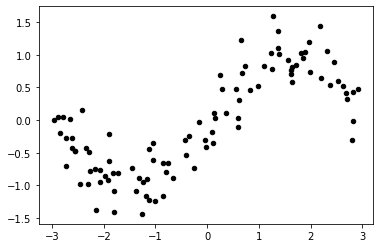

In [7]:
plt.scatter(X, y,marker='o',c='k',s=20)
plt.show()

###利用非分箱模型，观察效果

In [9]:
X = X.reshape(-1, 1) #注意机器学习模型不接受一维向量的特征矩阵，因此利用reshape把它转换成可用的矩阵

In [13]:
LinearR = LinearRegression().fit(X, y)
TreeR = DecisionTreeRegressor(random_state=0).fit(X, y)

###图像的可视化观察效果

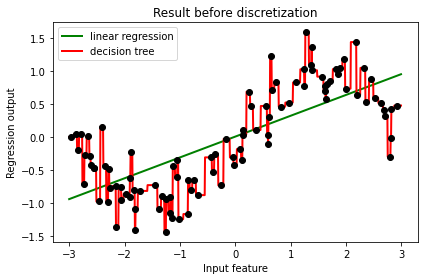

In [14]:
#放置画布
fig, ax1 = plt.subplots(1)

#创建测试数据：一系列分布在横坐标上的点
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

#将测试数据带入predict接口，获得模型的拟合效果并进行绘制
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green',
         label="linear regression")
ax1.plot(line, TreeR.predict(line), linewidth=2, color='red',
         label="decision tree")

#将原数据上的拟合绘制在图像上
ax1.plot(X[:, 0], y, 'o', c='k')

#其他图形选项
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")
plt.tight_layout()
plt.show()

#从图像来看，决策树的拟合效果更加好，它的图像十分接近sin的图像
#对于线性模型来讲，我们可以清楚的看到，它的拟合效果不太好

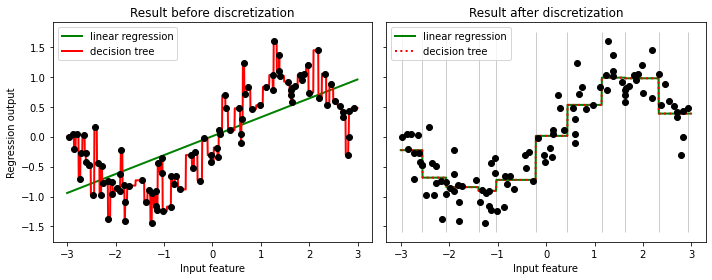

In [15]:
#下面我们来观察一下分箱线性回归的结果
#准备数据
#注意onehot的方式，它会构造哑变量帮助我们回归
enc = KBinsDiscretizer(n_bins=10,encode="onehot")
X_binned = enc.fit_transform(X)
line_binned = enc.transform(line)

#将两张图像绘制在一起，布置画布
fig, (ax1, ax2) = plt.subplots(ncols=2
                               , sharey=True #让两张图共享y轴上的刻度
                               , figsize=(10, 4))

#在图1中布置在原始数据上建模的结果
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green',
         label="linear regression")
ax1.plot(line, TreeR.predict(line), linewidth=2, color='red',
         label="decision tree")
#plot会根据marker和line的fmt是否已知进行不同的调整
ax1.plot(X[:, 0], y, 'o', c='k')
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")

#使用分箱数据进行建模
LinearR_ = LinearRegression().fit(X_binned, y)
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned, y)

#进行预测，在图2中布置在分箱数据上进行预测的结果
ax2.plot(line #横坐标
         , LinearR_.predict(line_binned) #分箱后的特征矩阵的结果
         , linewidth=2
         , color='green'
         , linestyle='-'
         , label='linear regression')

ax2.plot(line, TreeR_.predict(line_binned), linewidth=2, color='red',
         linestyle=':', label='decision tree')

#绘制和箱宽一致的竖线
ax2.vlines(enc.bin_edges_[0] #x轴
           , *plt.gca().get_ylim() #y轴的上限和下限
           , linewidth=1
           , alpha=.2)

#将原始数据分布放置在图像上
ax2.plot(X[:, 0], y, 'o', c='k')

#其他绘图设定
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")
plt.tight_layout()
plt.show()

In [23]:
type(enc.bin_edges_)

numpy.ndarray

###箱数的选择

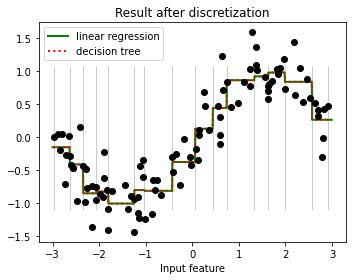

In [24]:
#下面观察分箱的多少对拟合的影响，逻辑上来讲，分的箱子越多，拟合的自然越精准，和泰勒展开一样
#这一次使用15箱，后面的代码和前面非常相似
enc = KBinsDiscretizer(n_bins=15,encode="onehot")
X_binned = enc.fit_transform(X)
line_binned = enc.transform(line)

fig, ax2 = plt.subplots(1,figsize=(5,4))

LinearR_ = LinearRegression().fit(X_binned, y)
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned, y)

ax2.plot(line #横坐标
         , LinearR_.predict(line_binned) #分箱后的特征矩阵的结果
         , linewidth=2
         , color='green'
         , linestyle='-'
         , label='linear regression')
ax2.plot(line, TreeR_.predict(line_binned), linewidth=2, color='red',
         linestyle=':', label='decision tree')
#把箱子的分界点标记了出来
ax2.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)
ax2.plot(X[:, 0], y, 'o', c='k')
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")
plt.tight_layout()
plt.show()

In [25]:
#下面演示一般的箱数选择方法，类似于网格搜索，即把想要test的箱数准备好，然后利用交叉验证
from sklearn.model_selection import cross_val_score as CVS
import numpy as np

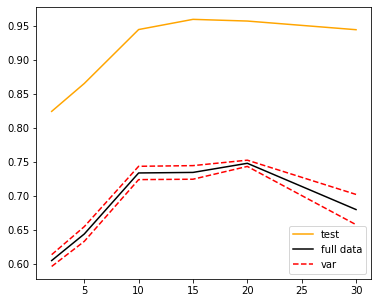

In [26]:
pred,score,var = [], [], []
binsrange = [2,5,10,15,20,30]
for i in binsrange:
    #实例化分箱类
    enc = KBinsDiscretizer(n_bins=i,encode="onehot")
    #转换数据
    X_binned = enc.fit_transform(X)
    line_binned = enc.transform(line)
    #建立模型
    LinearR_ = LinearRegression()
    #全数据集上的交叉验证
    cvresult = CVS(LinearR_,X_binned,y,cv=5)
    score.append(cvresult.mean())
    #方差的大小可以来反映泛化能力，即偏差方差分解
    var.append(cvresult.var())
    #测试数据集上的打分结果
    pred.append(LinearR_.fit(X_binned,y).score(line_binned,np.sin(line)))
#绘制图像
plt.figure(figsize=(6,5))
plt.plot(binsrange,pred,c="orange",label="test")
plt.plot(binsrange,score,c="k",label="full data")
plt.plot(binsrange,score+np.array(var)*0.5,c="red",linestyle="--",label = "var")
plt.plot(binsrange,score-np.array(var)*0.5,c="red",linestyle="--")
plt.legend()
plt.show()
#由图像可以观察得到箱数在10-20之间的，即10，15，20箱模型的能力比较稳定，方差也比较小，测试集上的表现也很好

##多项式线性回归

In [27]:
#多项式的线性回归的主要接口还是线性回归，不过它做了一个特征转换的过程

In [33]:
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.linear_model import LinearRegression
import numpy as np

In [34]:
rnd = np.random.RandomState(42) #设置随机数种子
X = rnd.uniform(-3, 3, size=100)
y = np.sin(X) + rnd.normal(size=len(X)) / 3

#将X升维，准备好放入sklearn中
X = X.reshape(-1,1)

#创建测试数据，均匀分布在训练集X的取值范围内的一千个点
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

In [35]:
#原始特征矩阵的拟合结果
LinearR = LinearRegression().fit(X, y)
#对训练数据的拟合
LinearR.score(X,y)

0.5361526059318595

In [36]:
#在测试集的表现，发现表现不是特别好
LinearR.score(line,np.sin(line))

0.6800102369793312

In [37]:
#多项式拟合，设定高次项
d=5

#进行高次项转换
poly = PF(degree=d,include_bias=False)
X_ = poly.fit_transform(X)
line_ = poly.transform(line)

#训练数据的拟合
LinearR_ = LinearRegression().fit(X_, y)
LinearR_.score(X_,y)
#观察到训练数据上的拟合结果相对来说已经非常的不错了，下面检查测试集

0.8561679370344799

In [38]:
#测试数据的拟合，观察到已经达到了0.987，结果已经十分理想
LinearR_.score(line_,np.sin(line))

0.9868904451787973

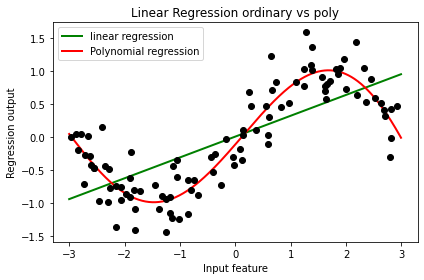

In [39]:
#将我们的结果可视化，观察拟合的效果
#放置画布
fig, ax1 = plt.subplots(1)

#将测试数据带入predict接口，获得模型的拟合效果并进行绘制
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green'
         ,label="linear regression")
ax1.plot(line, LinearR_.predict(line_), linewidth=2, color='red'
         ,label="Polynomial regression")

#将原数据上的拟合绘制在图像上
ax1.plot(X[:, 0], y, 'o', c='k')

#其他图形选项
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Linear Regression ordinary vs poly")
plt.tight_layout()
plt.show()
#观察下面的图像可以看到多项式确实在更好的逼近sin函数的弯曲的趋势